# MSDS 7331 - Project 1 - Visualization
## Team: Dineen Parker, Dale Legband, Ryan Shuhart

In [1]:
### Modules Used ###

# Pandas Module for data manipulation
import pandas as pd
import numpy as np

# pandas_profiling is a handy tool for inspecting data
# https://github.com/JosPolfliet/pandas-profiling
# pip install pandas-profiling
import pandas_profiling

# seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Page settings - might not need...
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# Prevents scientific notation formatting issues. Limits floats to one decimal place.
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

# Business Understanding
Credit card companies collect voluminous amounts of data which is ripe for analysis. The data for this project was originally provided to researchers to evaluate which data mining model could best predict defaults. The value of understanding the probability of who will default in advance given past behavior was once leading edge but now required to run a profitable credit card business. 
Here we wish to understand and visulalize the data and in future project build models that best predict the probability of default for each customer. 
* This data was collected as a part of the day to day business of running a credit card business. 
* The actual defaults per person are provided.  Plenty of data is provided to run test and validation runs. 
* Bank business people, with enough accuracy, can decide on actions to help the consumers avoid default or recover quickly.
* Accuracy of the forecast is important, but perfection cannot be expected.  Therefore, business actions will need to be adjusted based on the probability of default.
  * For example, selected individuals show on time payments for many months then suddenly default 'unexpectedly'.
* Accuracy can be tracked month by month and business practices adjusted accordingly.
* For the initial modeling, understanding and organizing the data is critical.
* Assumptions include:
  * The latest bill amount BILL_AMT1_SEPT is the amount defaulted upon.
  * Various adjustments given the real data as reported below.

# Data Understanding (80 points total)

* [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Give justifications for your
methods.

* [10 points] Visualize appropriate statistics (e.g., range, mode, mean, median, variance,
counts) for a subset of attributes. Describe anything meaningful you found from this or if
you found something potentially interesting. Note: You can also use data from other
sources for comparison. Explain why the statistics run are meaningful.

* [15 points] Visualize the most interesting attributes (at least 5 attributes, your opinion
on what is interesting). Important: Interpret the implications for each
visualization. Explain for each attribute why the chosen visualization is appropriate.

* [15 points] Visualize relationships between attributes: Look at the attributes via scatter
plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain
any interesting relationships.

* [10 points] Identify and explain interesting relationships between features and the class
you are trying to predict (i.e., relationships with variables and the target classification).

* [5 points] Are there other features that could be added to the data or created from
existing features? Which ones?

### Collect Initial Data
Data comes from the UCI Machine Learning Repository

http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

The given description: <br>
"This research aimed at the case of customer default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default."



In [2]:
# First row are for reference with header starting on line 2.
# ID field is use as the index field in the data frame
# Month specific columns renamed with month for readability
cc_data = (pd.read_excel("./cc_data/default of credit card clients.xls", skiprows=1, index_col='ID')
             .rename(columns={'PAY_0':'PAY_0_Sept', #No Pay_1
                              'PAY_2':'PAY_2_Aug', # change 'this':'to that'
                              'PAY_3':'PAY_3_July', 
                              'PAY_4':'PAY_4_June',
                              'PAY_5':'PAY_5_May',
                              'PAY_6':'PAY_6_April',
                              'BILL_AMT1':'BILL_AMT1_Sept', 
                              'BILL_AMT2':'BILL_AMT2_Aug', 
                              'BILL_AMT3':'BILL_AMT3_July', 
                              'BILL_AMT4':'BILL_AMT4_June', 
                              'BILL_AMT5':'BILL_AMT5_May',
                              'BILL_AMT6':'BILL_AMT6_April', 
                              'PAY_AMT1':'PAY_AMT1_Sept', 
                              'PAY_AMT2':'PAY_AMT2_Aug', 
                              'PAY_AMT3':'PAY_AMT3_July', 
                              'PAY_AMT4':'PAY_AMT4_June', 
                              'PAY_AMT5':'PAY_AMT5_May',
                              'PAY_AMT6':'PAY_AMT6_April'
                             })
             # Due to the many age values, creating age brackets
             .assign(AGE_range = lambda x: pd.cut(x['AGE'],[20,30,40,50,60,70,120], 6, 
                                                 labels=['21-30','31-40','41-50','51-60','61-70','71-80+']))
             # this creates a new variable for LIMIT_BAL_brackets
             .assign(LIMIT_BAL_range = lambda x: pd.cut(x['LIMIT_BAL'],[0,250000,500000,750000,1e7], 4, 
                                                 labels=['0-250k','>250k-500k','>500k-750k','>750k']))
             ## Below maps the numerical representation to categorical lable and sets object type to category
             # Did not overwrite binary default indicator, because will need 0-1 representation
             .assign(Default_Yes_No = lambda x: x['default payment next month'].apply({0:'No',
                                                                                       1:'Yes'}.get))
             .assign(SEX = lambda x: x['SEX'].apply({1:'Male', 
                                                     2:'Female'}.get))
             .assign(EDUCATION = lambda x: x['EDUCATION'].apply({1:'Graduate School', 
                                                                 2:'University',
                                                                 3:'High School',
                                                                 4:'Others'}.get))
             .assign(MARRIAGE = lambda x: x['MARRIAGE'].apply({1:'Married', 
                                                               2:'Single',
                                                               3:'Others'}.get))
                                                        
           )

print(cc_data.info())
# http://stackoverflow.com/questions/16575868/efficiently-creating-additional-columns-in-a-pandas-dataframe-using-map
# http://tomaugspurger.github.io/method-chaining.html
# http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 27 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null object
EDUCATION                     29655 non-null object
MARRIAGE                      29946 non-null object
AGE                           30000 non-null int64
PAY_0_Sept                    30000 non-null int64
PAY_2_Aug                     30000 non-null int64
PAY_3_July                    30000 non-null int64
PAY_4_June                    30000 non-null int64
PAY_5_May                     30000 non-null int64
PAY_6_April                   30000 non-null int64
BILL_AMT1_Sept                30000 non-null int64
BILL_AMT2_Aug                 30000 non-null int64
BILL_AMT3_July                30000 non-null int64
BILL_AMT4_June                30000 non-null int64
BILL_AMT5_May                 30000 non-null int64
BILL_AMT6_April               30000 non-null int64
PAY_AMT1_Sept        

### First Pass Verification of Data Quality

In [5]:
# look through categorical variables that have values not defined
cat_vars = ['SEX','EDUCATION','MARRIAGE','default payment next month', 'PAY_0_Sept',
            'PAY_2_Aug', 'PAY_3_July', 'PAY_4_June', 'PAY_5_May', 'PAY_6_April', 'AGE_range', 'LIMIT_BAL_range']

for i in range(len(cat_vars)):
    print(cat_vars[i])
    try:
        print(sorted(cc_data[cat_vars[i]].unique()))
    except TypeError: # work around to unsortable 'None'
        print(cc_data[cat_vars[i]].unique())
    print()

SEX
['Female', 'Male']

EDUCATION
['University' 'Graduate School' 'High School' None 'Others']

MARRIAGE
['Married' 'Single' 'Others' None]

default payment next month
[0, 1]

PAY_0_Sept
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

PAY_2_Aug
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

PAY_3_July
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

PAY_4_June
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

PAY_5_May
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]

PAY_6_April
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]

AGE_range
['21-30', '31-40', '41-50', '51-60', '61-70', '71-80+']

LIMIT_BAL_range
['0-250k', '>250k-500k', '>500k-750k', '>750k']



#### First Pass Observations
It appears EDUCATION, MARRIAGE, and PAY_0_Sept-PAY_6_April (history of past payment) have values not defined by the documentation. EDUCATION should only have values 1-4 representing graduate school(1), university(2), high school(3), and others(4), however, has 0, 5, and 6. The undefinded values make up only about 1% of the observations will be imputed to the 'others' category, 4. MARRIAGE documentation states 3 categories, married(1), single(2), and others(3), yet .2% of values are defined as 0. The value 0 for MARRIAGE will be imputed to the 'others' catgory of 3. According to the documentation, PAY_0_Sept-PAY_6_April, should have values -1 or 1-9, however, the data is different and the values range from -2 to 9. Following the logic, -2 might be two months early, -1 one month early, 0 on time, 1 one month late, and so on up to 9 where 9 represents 9 months late or more. The values -2 and 0 make up significant proportion of the data and will be kept. <br>

The next step will implement the imputatin as previously described.

In [6]:
# Impute undefined values. "~" symbol means to invert. Or for the below "not in"
cc_data.loc[(~cc_data['EDUCATION'].isin(['Graduate School','University','High School','Others'])), 'EDUCATION'] = 'Others'
cc_data.loc[(~cc_data['MARRIAGE'].isin(['Married','Single','Others'])), 'MARRIAGE'] = 'Others' 

# recheck
for i in range(len(cat_vars)):
    print(cat_vars[i])
    print(sorted(cc_data[cat_vars[i]].unique()))
    print()

SEX
['Female', 'Male']

EDUCATION
['Graduate School', 'High School', 'Others', 'University']

MARRIAGE
['Married', 'Others', 'Single']

default payment next month
[0, 1]

PAY_0_Sept
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

PAY_2_Aug
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

PAY_3_July
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

PAY_4_June
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

PAY_5_May
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]

PAY_6_April
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]

AGE_range
['21-30', '31-40', '41-50', '51-60', '61-70', '71-80+']

LIMIT_BAL_range
['0-250k', '>250k-500k', '>500k-750k', '>750k']



<B><I>Categorical data appears to be in better order now.

<hr>
### Variable Profile
The next cell uses a module called "pandas_profiling" created by Jos Polfliet. An overview is given at the top of the output, proceeded by the variables. There is a toggle link to expanded the details for each variable. Output is also sent to an HTML file viewable separately for convenience<br>

#### Variable Notes:
AGE - This variable is right skewed with a range from age 21 to 79. The average age is 35 with the median at 34. This variable is clean of outliers.

Bill Amount (BILL_AMT1_Sept - BILL_AMT6_April) - The amount of the credit card bill in Taiwan Dollar for the months April 2005 to September2015. The bill amounts across the months are highly correlated.

Default_Yes_No - This variable is the string version of 'default payment next month' translating 1 to 'Yes' and 0 to 'No.'

EDUCATION - Undergraduate degree (University) is the most common education level at 46.8%. The majority of observations (82.1%) are from individuals with an undergraduate degree (University) or better.

LIMIT_BAL - Ranges from 10k to 1mm with a median of 140k. The values are right skewed, however, no unreasonable looking outliers. The total credit limit extended to the sample is over five billion.

LIMIT_BAL_range - For analysis, LIMIT_BAL was categorized into 4 parts '0-250k', '>250k-500k', '>500k-750k', '>750k'

MARRIAGE - Single makes up the largest group at 53.2%, then Married at 45.5%, and lastly an Others group of 1.3%

Pay History (PAY_0_Sept - PAY_6_April) - The 3rd quartile for each month is zero meaning, most observations are zero or less. One month delays seem to be far more absent in months PAY_2_Aug to PAY_6_April, with PAY_5_May, PAY_6_April not having any at all and seems rather odd. Only PAY_0_Sept of 1 seems to fit as one would expect. As mentioned previously, the provided documentation does not explain the values of -2 and 0, but it can be inferred as not negative events. To resolve these problems, one solution would be to create a variable called has_Pay_Delay history and consolidate it to a binary TRUE/FALSE variable and, thereby, removing the month in which it occurred. 

Pay Amount (PAY_AMT1_Sept - PAY_AMT6_April) - Is the amount of the payment toward the credit card that month. About a fifth of the observations are zeros each month.

SEX - Females are the majority gender at 60.4%.

AGE_range - Variable was created by bracketing the ages from the AGE variable by 10 years ('21-30', '31-40', '41-50', '51-60', '61-70', '71-80+'). Seventy-two percent of the observations fall in to the first two categories "21-30" and "31-40."

default payment next month - This is a binary variable of 0 or 1. 22.1% of the obeservations were considered in default in October 2005 and this is the sample average.


#### Description of the Data per Offical Documentation
**LIMIT_BAL** (Ratio): Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.<br>
**SEX** (Nominal): Gender (1 = male; 2 = female)<br>
**EDUCATION** (Nominal): Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)<br>
**MARRIAGE** (Nominal): Marital status (1 = married; 2 = single; 3 = others)<BR>
**AGE** (Interval): Age (year)<BR>
**PAY_0_Sept - PAY_6_April** (Ordinal): History of past payment. The past monthly payment records (from April to September, 
2005). The measurement scale for the repayment status is: <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-1 = pay duly<BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1 - 8 = payment delay for one to eight months <BR>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;9 = payment delay for nine months and above<BR>
**BILL_AMT1_Sept - BILL_AMT6_April** (Ratio): Amount of bill statement (NT dollar) <BR>
**PAY_AMT1_Sept - PAY_AMT6_April** (Ratio): Amount of previous payment (NT dollar) <BR>
**default payment next month** (Nominal): default payment (Yes = 1, No = 0)

In [7]:
# Survey of all variables - Open
profile = pandas_profiling.ProfileReport(cc_data)
profile.to_file(outputfile="./ProfileReport.html")
profile

Number of variables,28
Number of observations,30000
Total Missing (%),0.0%
Total size in memory,6.0 MiB
Average record size in memory,210.0 B
Numeric,17
Categorical,6
Date,0
Text (Unique),0
Rejected,5
Distinct count,56


In [9]:
# Function to show counts and proportion of a given field
# def category_proportion(df, series_name):
#     df_counts = pd.DataFrame({series_name + '_Count' : df.groupby(series_name)[series_name].size(), 
#                   series_name+'_Prop' : df.groupby(series_name)[series_name].size().apply(
#                                         lambda x: float(x) / df.groupby(series_name).size().sum()*100)}).reset_index()
#     df_tots = pd.DataFrame({series_name:['_Total'],
#               series_name+'_Count':df_counts[series_name + '_Count'].sum(),
#               series_name+'_Prop':df_counts[series_name+'_Prop'].sum()})
#     return pd.concat([df_counts,df_tots])

# for i in range(len(cat_vars)):
#     print(category_proportion(cc_data, cat_vars[i]))
#     print()

<hr>
## Visualization of Summary Statistics
#### Demographics
- Distribution of age
- Distribution of sex
- Distribution of education

In [66]:
%matplotlib inline

<hr>
### AGE
#### Counts

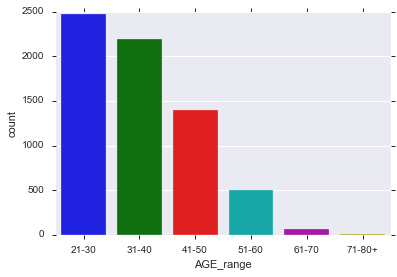

In [22]:
sns.countplot(cc_data[cc_data['default payment next month']==1]['AGE_range'])

#### Age Group by Gender
Females out number men in most age brackets. Almost twice as many females than males in the 21-30 bracket. There appears to be no outliers in age.

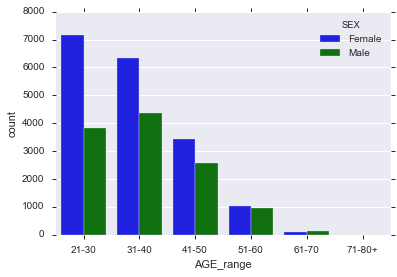

In [11]:
# Age Group by Sex
sns.countplot(data=cc_data, x='AGE_range', hue='SEX')

In [50]:
# sns.countplot(data=cc_data, x='SEX')

In [51]:
# category_proportion(cc_data,'SEX')

<hr>
#### Age Distribution by Gender
The age distribution of gender is similar. Males median age is slightly higher.

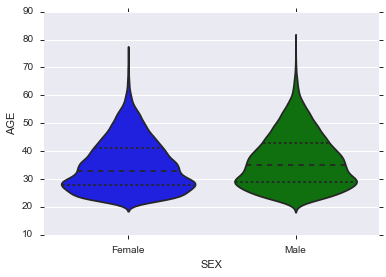

In [53]:
sns.violinplot(date=cc_data, x=cc_data['SEX'], y=cc_data['AGE'],inner="quart")

In [54]:
# sns.countplot(data=cc_data, x='MARRIAGE')

<hr>
#### Age by Marriage and SEX
The distribution of age across marriage is more centered than the single group. As one would expect, singleness preceeds marriage and occurs later in life. The 'Others' group is almost nearly normal

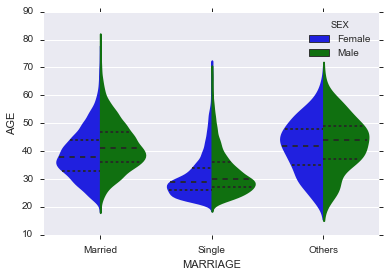

In [16]:
sns.violinplot(x=cc_data['MARRIAGE'], y=cc_data['AGE'], hue=cc_data['SEX'], split=True, inner="quart")

#### Age by Education and Gender
Post high school graduation age appears to be less than high school educated and might be due to taking longer in life to meet certain requirements for a credit card. High School appears to be near bimodal distributions.

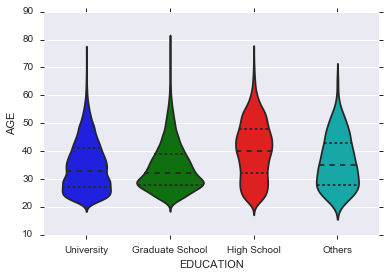

In [57]:
sns.violinplot(x=cc_data['EDUCATION'], y=cc_data['AGE'], inner="quart")

<hr>
### Education 
##### Counts
High School and Others make up a minority of the observations

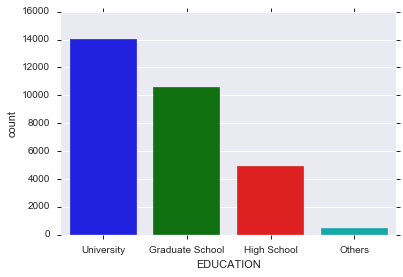

In [17]:
# sns.countplot(data=cc_data, x='EDUCATION')

### Limit Balance
#### Limit Balance by Education
High School has the lowest credit limit in general, whereas, the highest educated Graduate group has the largest median credit limit. Notably, Graduate School has a multimodal distribution with 4 peaks.

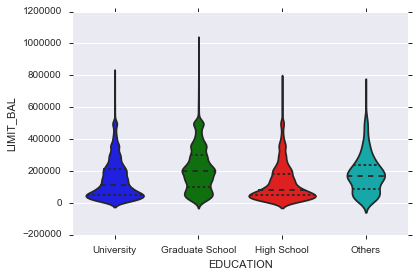

In [63]:
sns.violinplot(data=cc_data, x="EDUCATION", y='LIMIT_BAL', inner="quart")

#### Limit Balance by AGE
There is a positive relation ship of AGE to Credit Limit

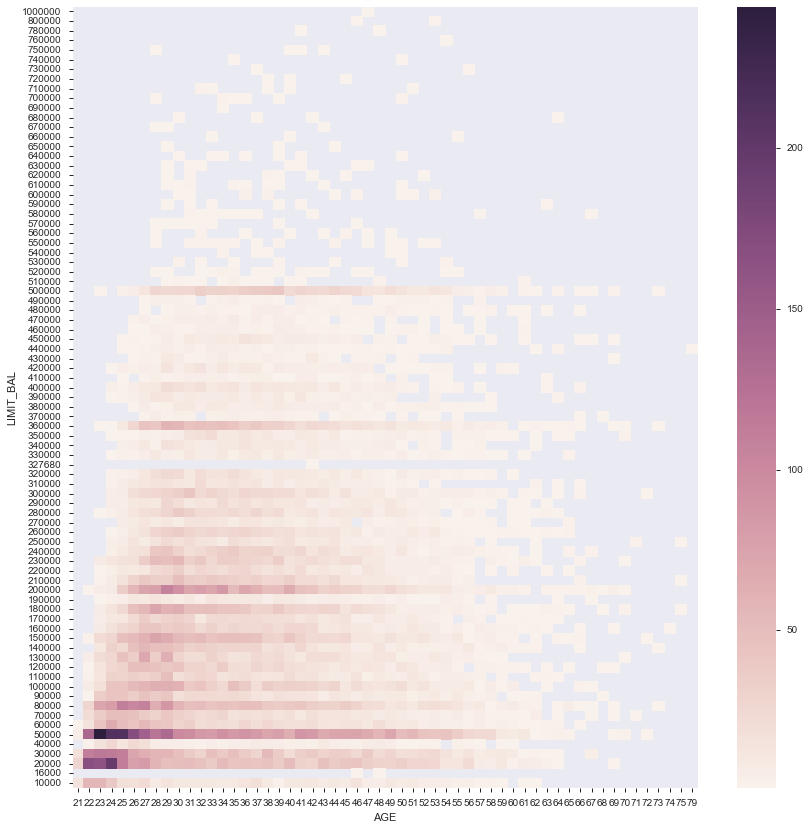

In [102]:
to_map = cc_data.groupby(['LIMIT_BAL','AGE']).size().unstack()
f = plt.figure(figsize=(14, 14))
f = sns.heatmap(to_map)
f.invert_yaxis()

### Distribution of Defaults
 - by age
 - by sex
 - by education
 - by marriage

- Distribution of Defaults
 - age sex
 - age education
 - age marriage
 - sex education
 - sex marriage
 - education marriage
<br><br>
- CC History frequency tables
 - by age
 - by sex
 - by education
 - by marriage<br><br>
 
 - default rate of no bill balances ever 36.6%
 - default rate of only one bill balance for sept 20.7%
 - default rate of carrying balances vs never carrying 

In [20]:
avg_default_rate = cc_data['default payment next month'].sum()/cc_data['default payment next month'].count()*100
print("The average default rate is %.1f%%" % avg_default_rate)

The average default rate is 22.1%


#### Distibution of Default by Credit Limit
Those with lower credit limits are more likely to default.

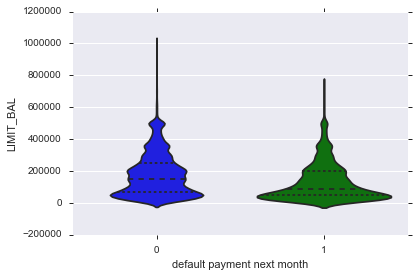

In [67]:
sns.violinplot(data=cc_data, x='default payment next month',y='LIMIT_BAL', inner="quart")

<hr>
#### Distribution of Defaults by Age and Sex Relative to the Sample Average
The age group of 71-80+ has the worst default rate regardless of gender and is 11.2 percentage points higher than the sample average. Females in the 31-40 age bracket are below average.

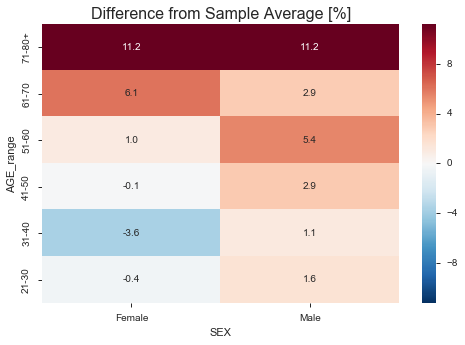

In [141]:
def heat_map(to_map):
    # Count of distribution
    age_v_sex_default = cc_data.groupby(to_map)

    # Proportion of default
    x_count = age_v_sex_default['default payment next month'].count().unstack()
    x_sum = age_v_sex_default['default payment next month'].sum().unstack()

    # Relative proportion of default to the total average
    plt.figure(figsize=(8, 5))
    plt.title('Difference from Sample Average [%]', fontsize=16)
    p = sns.heatmap((x_sum/x_count)*100 - avg_default_rate, annot=True, fmt=".1f")
    p.invert_yaxis()
    
heat_map(['AGE_range','SEX'])

<hr>
#### Distribution of Defaults by Age and Education Relative to Sample Average
The eldest High School goup are the worst offenders of default. Overall the Others group does better on average, however, this group is not a frequent. Age 21-50 of Graduate School educated manage their credit card better with below average default. A negative relationship is present in the Graduate School as age increases.

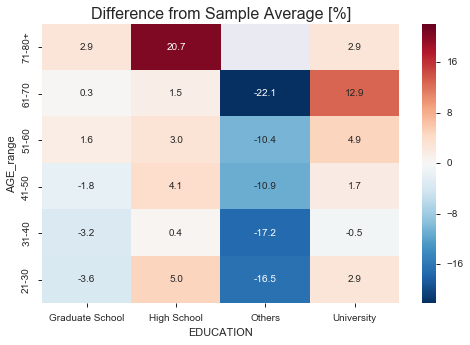

In [142]:
heat_map(['AGE_range','EDUCATION'])

In [27]:
# Count of distribution

cm = sns.light_palette("gray", as_cmap=True)

age_v_edu_default = cc_data.groupby(['AGE_range','EDUCATION'])
age_v_edu_default['default payment next month'].size().unstack().style.background_gradient(cmap=cm)

In [28]:
# Proportion of default

cm = sns.light_palette("red", as_cmap=True)
x_count = age_v_edu_default['default payment next month'].count().unstack()
x_sum = age_v_edu_default['default payment next month'].sum().unstack()
((x_sum/x_count)*100).style.background_gradient(cmap=cm)

In [90]:
# Relative proportion of default to the total average

cm = sns.light_palette("red", as_cmap=True)
x_count = age_v_edu_default['default payment next month'].count().unstack()
x_sum = age_v_edu_default['default payment next month'].sum().unstack()
((x_sum/x_count)*100 - avg_default_rate).style.background_gradient(cmap=cm)

<hr>
#### Distribution of Defaults by Age and Marriage

In [30]:
# Count of distribution

cm = sns.light_palette("gray", as_cmap=True)

age_v_mar_default = cc_data.groupby(['AGE_range','MARRIAGE'])
age_v_mar_default['default payment next month'].size().unstack().style.background_gradient(cmap=cm)

In [31]:
# Proportion of default

cm = sns.light_palette("red", as_cmap=True)
x_count = age_v_mar_default['default payment next month'].count().unstack()
x_sum = age_v_mar_default['default payment next month'].sum().unstack()
((x_sum/x_count)*100).style.background_gradient(cmap=cm)

In [32]:
# Relative proportion of default to the total average

cm = sns.light_palette("red", as_cmap=True)
x_count = age_v_mar_default['default payment next month'].count().unstack()
x_sum = age_v_mar_default['default payment next month'].sum().unstack()
((x_sum/x_count)*100 - avg_default_rate).style.background_gradient(cmap=cm)

<hr>
## Distribution of Defaults by Sex and Marriage

In [33]:
# Count of distribution

cm = sns.light_palette("gray", as_cmap=True)

sex_v_mar_default = cc_data.groupby(['SEX','MARRIAGE'])
sex_v_mar_default['default payment next month'].size().unstack().style.background_gradient(cmap=cm)

In [34]:
# Proportion of default

cm = sns.light_palette("red", as_cmap=True)
x_count = sex_v_mar_default['default payment next month'].count().unstack()
x_sum = sex_v_mar_default['default payment next month'].sum().unstack()
((x_sum/x_count)*100).style.background_gradient(cmap=cm)

In [35]:
# Relative proportion of default to the total average

cm = sns.light_palette("red", as_cmap=True)
x_count = sex_v_mar_default['default payment next month'].count().unstack()
x_sum = sex_v_mar_default['default payment next month'].sum().unstack()
((x_sum/x_count)*100 - avg_default_rate).style.background_gradient(cmap=cm)

<hr>
## Distribution of Defaults by Sex and Education

In [36]:
# Count of distribution

cm = sns.light_palette("gray", as_cmap=True)

sex_v_edu_default = cc_data.groupby(['SEX','EDUCATION'])
sex_v_edu_default['default payment next month'].size().unstack().style.background_gradient(cmap=cm)

In [37]:
# Proportion of default

cm = sns.light_palette("red", as_cmap=True)
x_count = sex_v_edu_default['default payment next month'].count().unstack()
x_sum = sex_v_edu_default['default payment next month'].sum().unstack()
((x_sum/x_count)*100).style.background_gradient(cmap=cm)

In [38]:
# Relative proportion of default to the total average

cm = sns.light_palette("red", as_cmap=True)
x_count = sex_v_edu_default['default payment next month'].count().unstack()
x_sum = sex_v_edu_default['default payment next month'].sum().unstack()
((x_sum/x_count)*100 - avg_default_rate).style.background_gradient(cmap=cm)

<hr>
## Distribution of Defaults by Marriage and Education

In [39]:
# Count of distribution

cm = sns.light_palette("gray", as_cmap=True)

mar_v_edu_default = cc_data.groupby(['MARRIAGE','EDUCATION'])
mar_v_edu_default['default payment next month'].size().unstack().style.background_gradient(cmap=cm)

In [40]:
# Proportion of default

cm = sns.light_palette("red", as_cmap=True)
x_count = mar_v_edu_default['default payment next month'].count().unstack()
x_sum = mar_v_edu_default['default payment next month'].sum().unstack()
((x_sum/x_count)*100).style.background_gradient(cmap=cm)

In [41]:
# Relative proportion of default to the total average

cm = sns.light_palette("red", as_cmap=True)
x_count = mar_v_edu_default['default payment next month'].count().unstack()
x_sum = mar_v_edu_default['default payment next month'].sum().unstack()
((x_sum/x_count)*100 - avg_default_rate).style.background_gradient(cmap=cm)

<hr>
## Distribution of Defaults by Age, Sex, Marriage, Education

In [42]:
cm = sns.light_palette("gray", as_cmap=True)

age_sex_mar_edu_default = cc_data.groupby(['AGE_range','SEX','MARRIAGE','EDUCATION'])
age_sex_mar_edu_default['default payment next month'].size().unstack().style.background_gradient(cmap=cm)

In [43]:
cm = sns.light_palette("red", as_cmap=True)
x_count = age_sex_mar_edu_default['default payment next month'].count().unstack()
x_sum = age_sex_mar_edu_default['default payment next month'].sum().unstack()
((x_sum/x_count)*100).style.background_gradient(cmap=cm)

In [44]:
# Relative proportion of default to the total average

cm = sns.light_palette("red", as_cmap=True)
x_count = age_sex_mar_edu_default['default payment next month'].count().unstack()
x_sum = age_sex_mar_edu_default['default payment next month'].sum().unstack()
((x_sum/x_count)*100 - avg_default_rate).style.background_gradient(cmap=cm)

<hr>
## Distribution of Defaults by Payment Delay Pattern

In [45]:
pay_delayed_default = cc_data.groupby(['PAY_0_Sept','PAY_2_Aug', 'PAY_3_July', 'PAY_4_June', 'PAY_5_May', 'PAY_6_April'])
pay_delayed_default_pattern= (pay_delayed_default['default payment next month']
                              .size()
                              .reset_index()
                              .rename(columns={0:'Count'})
                              )
pay_delayed_default_pattern[:25]

,PAY_0_Sept,PAY_2_Aug,PAY_3_July,PAY_4_June,PAY_5_May,PAY_6_April,Count
0,-2,-2,-2,-2,-2,-2,2109
1,-2,-2,-2,-2,-2,-1,88
2,-2,-2,-2,-2,-1,-1,49
3,-2,-2,-2,-2,-1,0,28
4,-2,-2,-2,-2,-1,2,8
5,-2,-2,-2,-2,0,-1,1
6,-2,-2,-2,-2,0,0,2
7,-2,-2,-2,-1,-1,-2,16
8,-2,-2,-2,-1,-1,-1,33
9,-2,-2,-2,-1,-1,0,13


In [46]:
x_count = age_pay_delayed_default['default payment next month'].count().reset_index()
x_sum = age_pay_delayed_default['default payment next month'].sum().reset_index()
prop_default = ((x_sum['default payment next month']/x_count['default payment next month'])*100)
pay_delayed_default_pattern['Default_Proportion'] = prop_default

NameError: name 'age_pay_delayed_default' is not defined

In [47]:
# Top 20 payment delay patterns sorted by default frequency
(pay_delayed_default_pattern[pay_delayed_default_pattern['Count'] >100]
     .sort_values(by='Default_Proportion', ascending=False)[:20])

KeyError: 'Default_Proportion'

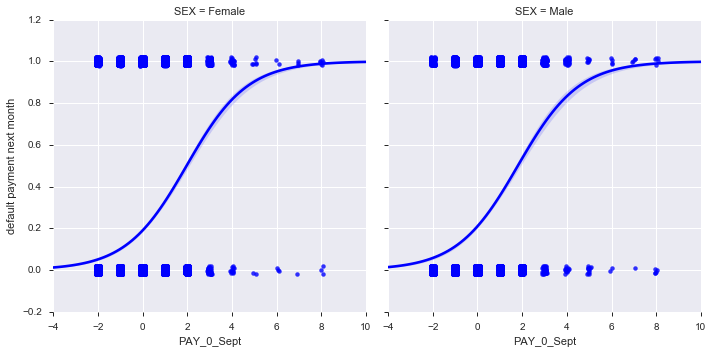

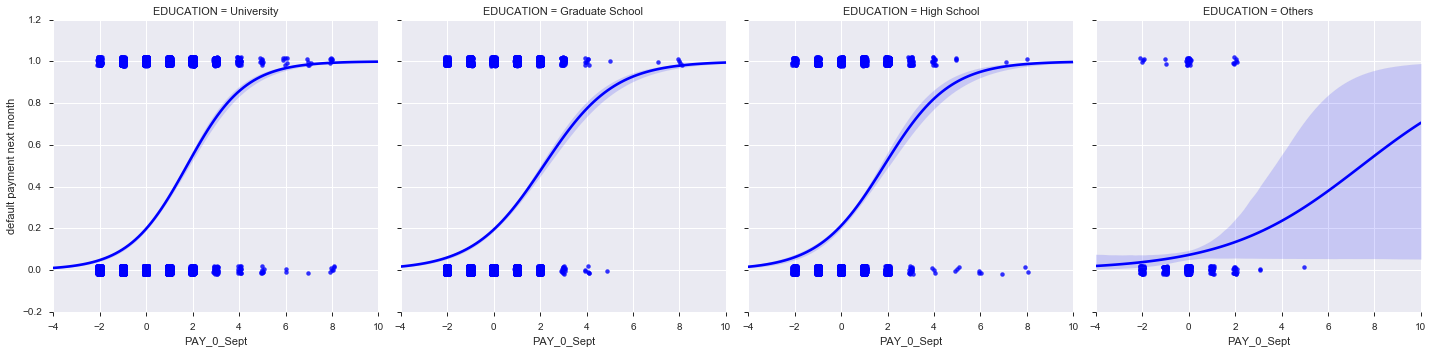

In [48]:
#Logistic line for 
sns.lmplot(data=cc_data, x='PAY_0_Sept', y='default payment next month', x_jitter=.1, y_jitter=.02, col='SEX', logistic=True)
sns.lmplot(data=cc_data, x='PAY_0_Sept', y='default payment next month', x_jitter=.1, y_jitter=.02, col='EDUCATION', logistic=True)


### Explore the data

# Exceptional Work (10 points total)
* You have free reign to provide additional analyses.
*One idea: implement dimensionality reduction, then visualize and interpret the results.

feature creation ideas:
* Age brackets
* Ratio of Pay Amount to Bill Amount
* Ratio of Bill Amount to LIMIT_BAL
* Transformation of data - scaling
* has_Pay_Delay

Sources:
https://www.wakari.io/sharing/bundle/ijstokes/pyvis-1h?has_login=False

#### Correlation of Bill Amount
Bill amount of other months are highly correlated

C:\Users\ryan.shuhart\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\ryan.shuhart\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


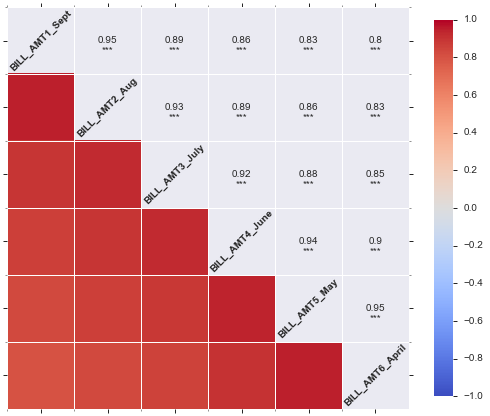

In [80]:
sns.axes_style("white")
f, ax = plt.subplots(figsize=(9, 9))
sns.corrplot(cc_data[['BILL_AMT1_Sept', 'BILL_AMT2_Aug', 'BILL_AMT3_July', 
            'BILL_AMT4_June','BILL_AMT5_May', 'BILL_AMT6_April']])

		never_bal	something bal
    	317			6319
		870			29130
		
def		0.364367816	0.216924133
no def	0.635632184	0.783075867
		0.57323689	0.277015475
		
		2.069331649	
<hr>